In [7]:
import helper
import plotting
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [8]:
# Set the path to the data directory and model directory
PATH = ["F:/cellpose/full_set"]
MOD_DIR= "F:/cellpose/full_set/train/models"

In [9]:
# Run the prediction	
res = helper.prediction.batch_predict(MOD_DIR,PATH,mute=True,return_results=True,save_masks=False,min_size=-1)

full_set found...


F:/cellpose/full_set/train/: 100%|██████████| 67/67 [06:35<00:00,  5.90s/image]


In [12]:
# Get style vectors and names
all_styles = res['full_set_0']['styles']
all_names = res['full_set_0']['id']

In [24]:
len(all_names)

81

In [175]:
import pandas as pd
import numpy as np


aData = pd.DataFrame(all_styles)
aData=aData
aData.shape

(81, 256)

In [179]:
aData

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.052837,0.044302,-0.060934,-0.022896,-0.036822,-0.040392,-0.003935,0.032112,-0.123135,-0.045731,...,-0.066033,-0.030276,0.000550,-0.041034,0.090739,-0.033800,-0.061649,-0.089189,-0.017061,0.004383
1,-0.152976,-0.058930,-0.102029,-0.098132,-0.096189,-0.064598,-0.055691,-0.033742,-0.032498,-0.016524,...,0.037270,-0.048080,-0.090941,-0.039927,0.056041,-0.011465,0.002497,0.124015,0.033605,0.022906
2,-0.065861,0.166494,-0.059174,0.001736,0.071170,0.021731,0.086954,0.064889,-0.064294,-0.052305,...,-0.027028,-0.058344,0.044794,0.002346,-0.001367,-0.022308,0.005666,-0.133399,-0.026586,-0.023107
3,-0.086441,0.137610,0.074521,0.028383,-0.074326,0.017408,-0.083926,-0.009461,0.050520,0.033605,...,0.065905,-0.041030,-0.034234,0.006938,-0.052078,0.067764,0.009135,-0.023131,0.040846,-0.009084
4,-0.163104,-0.010619,-0.093718,-0.126514,-0.073874,-0.014286,-0.032382,-0.051782,-0.021627,0.016708,...,0.039464,0.030787,-0.025420,-0.040252,-0.013669,0.004729,-0.043247,0.046462,0.026468,-0.027343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.078795,-0.115400,-0.087443,-0.124125,-0.104347,-0.064630,-0.042587,-0.057852,-0.098079,-0.043581,...,-0.020518,0.013621,-0.065473,-0.064975,0.078105,-0.035408,-0.019180,0.058869,0.005013,0.049118
77,-0.113770,-0.066212,-0.078813,-0.116370,-0.095091,-0.039535,-0.070323,-0.011329,-0.038654,-0.006400,...,-0.033772,-0.027807,-0.108135,-0.049877,0.049957,-0.053228,-0.008464,0.145858,0.040055,0.049791
78,-0.197206,0.038563,-0.074247,-0.121842,0.006920,0.014286,0.015942,-0.039612,-0.000944,0.023584,...,0.000908,-0.040893,-0.050571,0.053917,-0.080641,-0.027846,-0.070402,0.071414,0.064716,-0.023128
79,-0.136820,0.187097,-0.088186,-0.044468,-0.017301,0.022726,-0.011614,0.013581,-0.027426,-0.034989,...,0.034139,-0.078221,-0.037954,0.008369,-0.038874,0.007918,0.005218,-0.082960,0.046403,-0.066885


In [185]:
from scipy.sparse import csc_matrix
sparseMatrix = csc_matrix(all_styles, 
                          dtype = np.float32).toarray()
sparseMatrix.shape

(81, 256)

In [213]:
import scanpy as sc
adata=sc.AnnData(sparseMatrix)

In [214]:
adata

AnnData object with n_obs × n_vars = 81 × 256

In [219]:
adata.obs_names= all_names
adata

AnnData object with n_obs × n_vars = 81 × 256

In [216]:
print(adata.obs_names[:10])

Index(['4_P1060348_3', 'DS8-S2_3', 'GU_bar7_0', 'K1_2_C1_DJI_0385_clipped_4',
       'L2_1_C1_DJI_0371_3', 'S1_a_DJI_0003_2_0', 'S1_g_DJI_0171_2_0',
       'S1_g_DJI_0171_2_3', 'S1_g_DJI_0208_2_6', 'S9_5_C1_DJI_0102_2'],
      dtype='object')


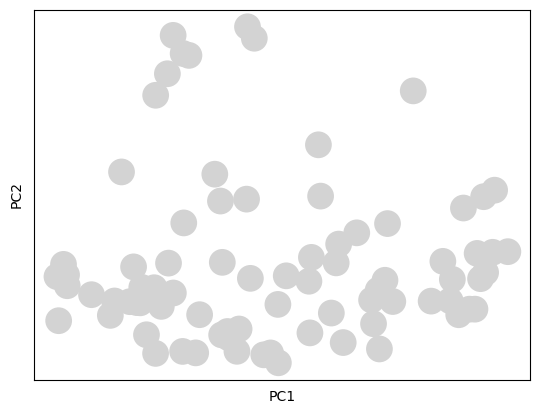

In [222]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

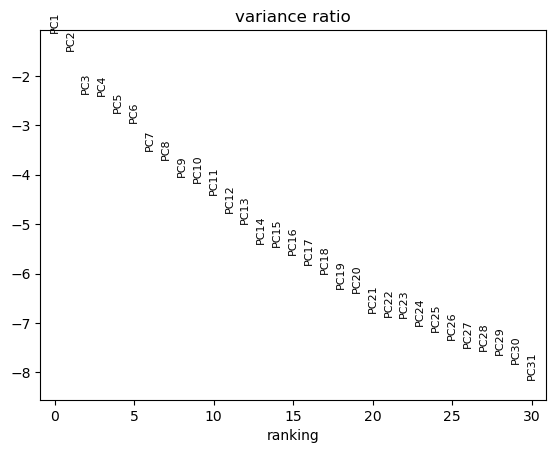

In [223]:
sc.pl.pca_variance_ratio(adata, log=True)

In [224]:
sc.pp.neighbors(adata, n_neighbors=100, n_pcs=40)

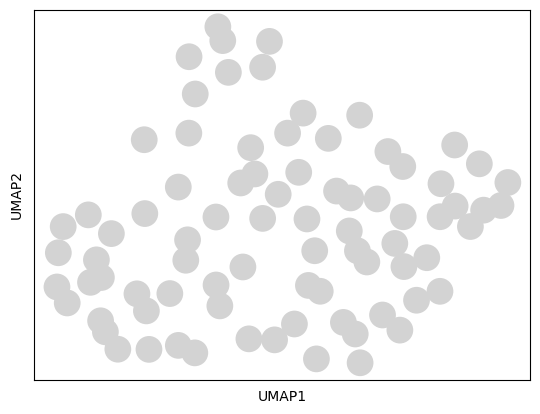

In [226]:
sc.tl.umap(adata)
sc.pl.umap(adata)

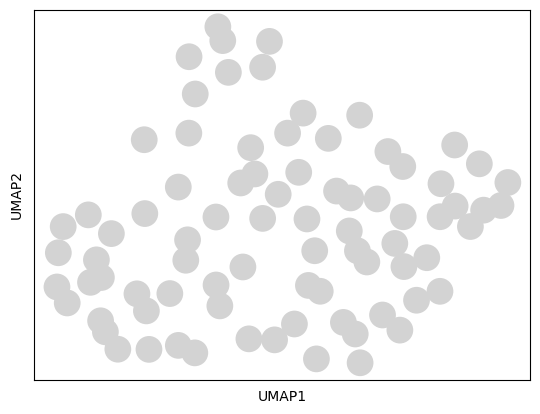

In [228]:
sc.pl.umap(adata, use_raw=False)

In [235]:
sc.tl.tsne(adata)

In [236]:
adata

AnnData object with n_obs × n_vars = 81 × 256
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

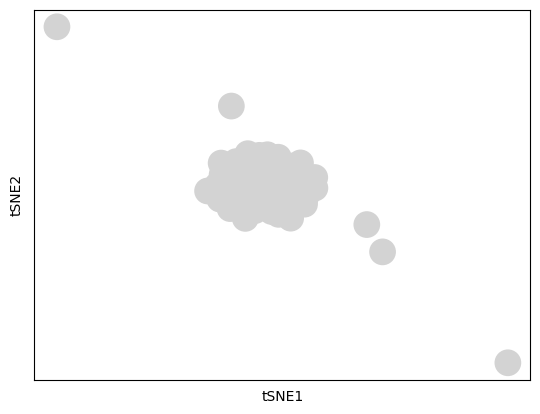

In [237]:
sc.pl.tsne(adata)

In [141]:
test=sc.pp.neighbors(andata, use_rep='X', n_neighbors=100)

In [142]:
andata

AnnData object with n_obs × n_vars = 81 × 256
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

In [147]:
sc.tl.leiden(andata, resolution=0.5, neighbors_key='neighbors')

In [150]:
andata

AnnData object with n_obs × n_vars = 81 × 256
    obs: 'leiden'
    uns: 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

In [151]:
sc.pl.(andata, color=['leiden'],size=10)

KeyError: "Could not find 'tsne' or 'X_tsne' in .obsm"

In [149]:
sc.pl.scatter(andata, basis='leiden')

KeyError: 'compute coordinates using visualization tool leiden first'

In [10]:
import pickle
output = open('res_tSNE_1.pkl', 'wb')
pickle.dump(res, output)
output.close()

In [6]:
import pickle
pkl_file = open('res_tSNE.pkl','rb')
res = pickle.load(pkl_file)
pkl_file.close()

EOFError: Ran out of input

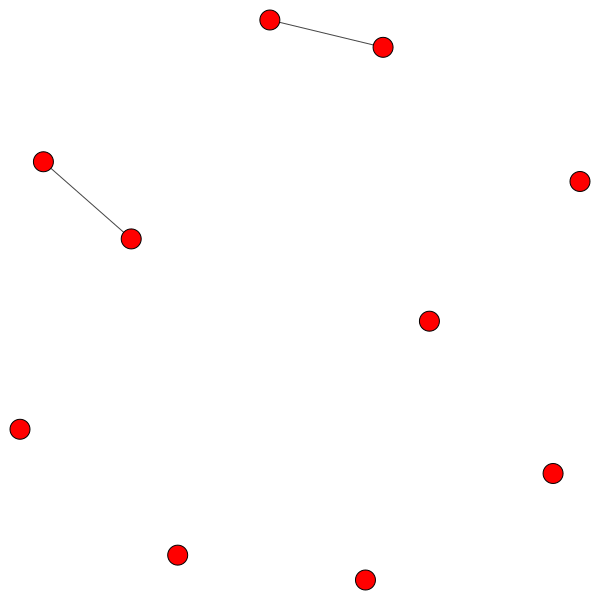

In [12]:
partition = la.find_partition(G, la.ModularityVertexPartition)

AttributeError: 'list' object has no attribute 'vcount'